#Load the required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Mock dataset

In [ ]:
x_mock=np.array((1.0,2.0,3.0,4.0,5.0))
y_mock=np.array((2.3,4.1,6.2,8.1,10.0))
err_y_mock=np.array((0.08, 0.12, 0.2 , 0.16, 0.28))

#Plot datapoint

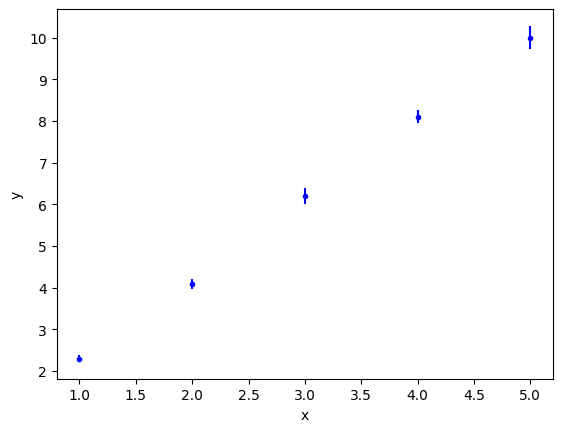

In [ ]:
plt.errorbar(x_mock,y_mock,err_y_mock,fmt='b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Perform Chi-square analysis

In [67]:
a=np.linspace(0,2,10)
a

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [ ]:
a_arr=[]
b_arr=[]
chi_sq_arr=[]
for a in np.arange(0,1,0.0001):
    for b in np.arange(0.0,3,0.0005):
      chi_sq=0
      for i in range(0,len(x_mock)):
          y_th=a+b*x_mock[i]
          chi_sq1=((y_mock[i]-y_th)/err_y_mock[i])**2
          chi_sq=chi_sq+chi_sq1
      a_arr.append(a)
      b_arr.append(b)
      chi_sq_arr.append(chi_sq)
 #This cell will take around 8 minutes.     

#Save Arrays in a Text file

In [ ]:
np.savetxt('store_file.txt',)

In [ ]:
np.savetxt('/content/drive/My Drive/Colab_Notebooks/10_Conference_Schools/Workshop_Nagpur_2023/a_b_Chi_sq_array_T.txt',
           np.transpose([a_arr,b_arr,chi_sq_arr]),fmt='%10.5f',newline='\n',delimiter=' ')
 #This cell will take around 4 minutes.     

#Load text file using Pandas 

In [ ]:
df = pd.read_csv ('/content/drive/My Drive/Colab_Notebooks/10_Conference_Schools/Workshop_Nagpur_2023/a_b_Chi_sq_array.txt',
                  sep="\s+",names=["a","b","chi2"])


In [ ]:
df

,a,b,chi2
0,0.0000,0.0000,6793.32444
1,0.0000,0.0005,6790.02764
2,0.0000,0.0010,6786.73164
3,0.0000,0.0015,6783.43645
4,0.0000,0.0020,6780.14205
...,...,...,...
59999995,0.9999,2.9975,2783.00050
59999996,0.9999,2.9980,2785.09851
59999997,0.9999,2.9985,2787.19733
59999998,0.9999,2.9990,2789.29695


#Find minimim $\chi^2$ values

In [ ]:
df_min=df.loc[df['chi2'].idxmin()]
df_min

a       0.34090
b       1.93150
chi2    1.01585
Name: 20457863, dtype: float64

#Estimate Confidence Intervals

##$68.27\%$ confidence level

In [ ]:
df_1_sig = df[(round(df['chi2'],3) ==round (df_min[2],3)+2.3)]
df_1_sig

,a,b,chi2
10617984,0.1769,1.9920,3.31632
10623981,0.1770,1.9905,3.31640
10623986,0.1770,1.9930,3.31563
10629980,0.1771,1.9900,3.31595
10635979,0.1772,1.9895,3.31618
...,...,...,...
30285735,0.5047,1.8675,3.31598
30303748,0.5050,1.8740,3.31616
30309737,0.5051,1.8685,3.31568
30327744,0.5054,1.8720,3.31551


##Plot $68.27\%$ Confidence Level

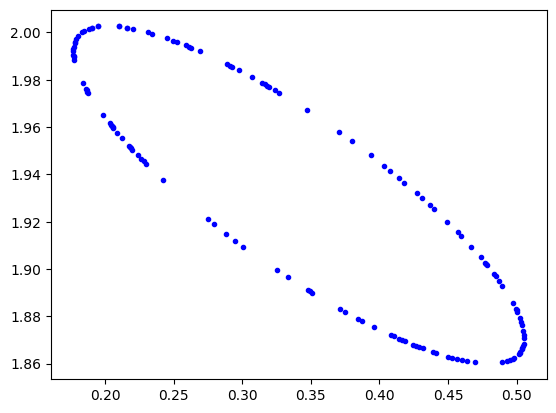

In [ ]:
plt.plot(df_1_sig['a'],df_1_sig['b'],'b.')

##$95.45\%$ confidence level

In [ ]:
df_2_sig = df[(round(df['chi2'],3) ==round (df_min[2],3)+6.18)]
df_2_sig

,a,b,chi2
4318061,0.0719,2.0305,7.19627
4336055,0.0722,2.0275,7.19628
4342054,0.0723,2.0270,7.19639
4366051,0.0727,2.0255,7.19573
4366070,0.0727,2.0350,7.19580
...,...,...,...
36495650,0.6082,1.8250,7.19622
36513681,0.6085,1.8405,7.19589
36561677,0.6093,1.8385,7.19591
36615659,0.6102,1.8295,7.19581


##Plot $95.45\%$ Confidence Level

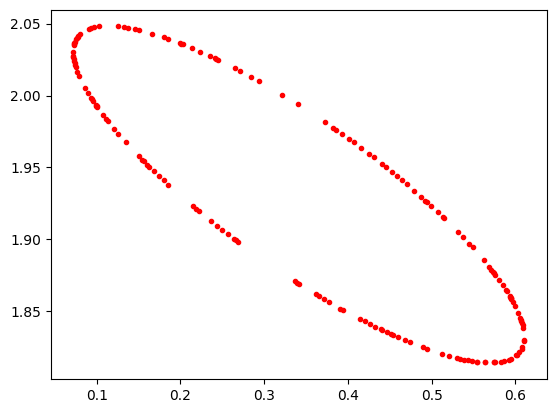

In [ ]:
plt.plot(df_2_sig['a'],df_2_sig['b'],'r.')

##$99.70\%$ confidence level

In [ ]:
df_3_sig = df[(round(df['chi2'],3) ==round (df_min[2],3)+11.83)]
df_3_sig

,a,b,chi2
106042,0.0017,2.0210,12.84586
244038,0.0040,2.0190,12.84618
478185,0.0079,2.0925,12.84582
898186,0.0149,2.0930,12.84628
904186,0.0150,2.0930,12.84562
...,...,...,...
42723573,0.7120,1.7865,12.84579
42807581,0.7134,1.7905,12.84600
42813582,0.7135,1.7910,12.84618
42825585,0.7137,1.7925,12.84612


##Plot $99.7\%$ Confidence Level

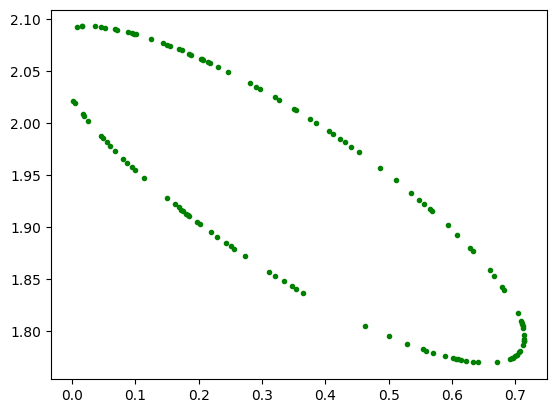

In [ ]:
plt.plot(df_3_sig['a'],df_3_sig['b'],'g.')

#Final Output

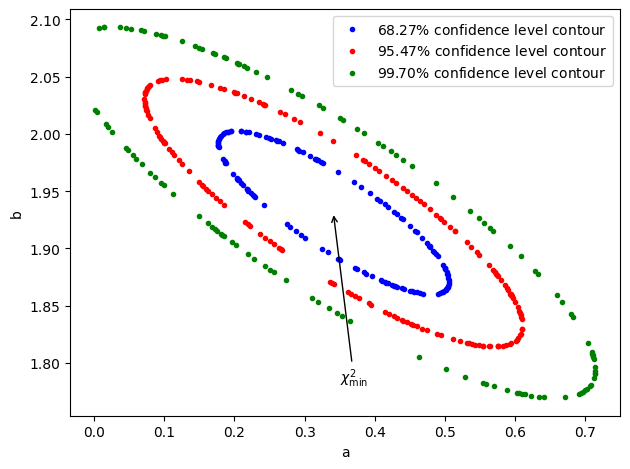

In [ ]:
plt.xlabel('a')
plt.ylabel("b")
plt.plot(df_1_sig['a'], df_1_sig['b'],'b.',label='$68.27\%$ confidence level contour')
plt.plot(df_2_sig['a'], df_2_sig['b'],'r.',label='$95.47\%$ confidence level contour')
plt.plot(df_3_sig['a'], df_3_sig['b'],'g.',label='$99.70\%$ confidence level contour')
plt.legend(loc="upper right")
plt.annotate("$\chi^2_{\mathrm{min}}$", xy=(df_min[0],df_min[1]), xytext=(0.35, 1.783), arrowprops=dict(arrowstyle="->"))
plt.tight_layout()

#Least Square fitting by using **lmfit**

In [ ]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel

x=np.array((1.0,2.0,3.0,4.0,5.0))
y=np.array((2.3,4.1,6.2,8.1,10.0))
yerr=np.array((0.08, 0.12, 0.2 , 0.16, 0.28))

mod = ExpressionModel('(a+b*x)')
pars = mod.make_params(c0=0, c1=0) #initial points for parameters
result = mod.fit(y, pars, x=x, weights=1.0/yerr**2)
print(result.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 5
    # variables        = 2
    chi-square         = 66.0381591
    reduced chi-square = 22.0127197
    Akaike info crit   = 16.9039742
    Bayesian info crit = 16.1228500
    R-squared          = -0.75390840
[[Variables]]
    c0:  0.37435540 +/- 0.05261498 (14.05%) (init = 0)
    c1:  1.91302639 +/- 0.03350356 (1.75%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(c0, c1) = -0.865


In [ ]:
import numpy as np
import lmfit

# Define the model
def my_model(x, c0, c1):
    return (c0 +c1* x)

# Define the data
x = np.array((1.0, 2.0, 3.0, 4.0, 5.0))
y = np.array((2.3, 4.1, 6.2, 8.1, 10.0))
yerr = np.array((0.08, 0.12, 0.2, 0.16, 0.28))

# Create a model object and set initial parameter values
mod = lmfit.Model(my_model)
params = mod.make_params(c0=1, c1=1)

# Fit the model to the data
result = mod.fit(y, params, x=x, weights=1/yerr)

# Print the fit report
print(result.fit_report())



[[Model]]
    Model(my_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 1.01584378
    reduced chi-square = 0.33861459
    Akaike info crit   = -3.96859168
    Bayesian info crit = -4.74971585
    R-squared          = 0.97302019
[[Variables]]
    c0:  0.34119666 +/- 0.06303399 (18.47%) (init = 1)
    c1:  1.93139131 +/- 0.02738371 (1.42%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c0, c1) = -0.848


In [ ]:
result.params

name,value,standard error,relative error,initial value,min,max,vary
c0,0.34119666,0.06303399,(18.47%),1,-inf,inf,True
c1,1.93139131,0.02738371,(1.42%),1,-inf,inf,True


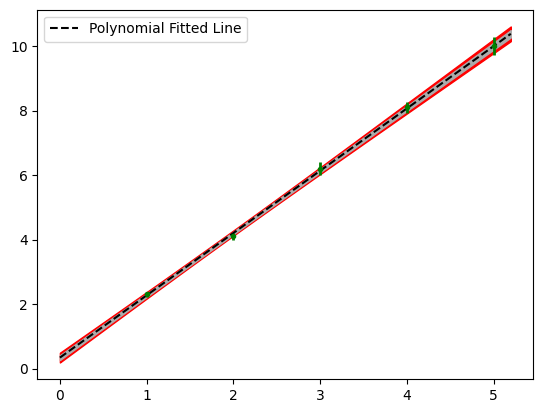

In [ ]:
xfine = np.arange(0,5.2,0.001)
ypred = result.eval(x=xfine)
dely = result.eval_uncertainty(x=xfine, sigma=1)
plt.errorbar(x, y, yerr, linewidth=2, color='g',fmt='.')
plt.plot(xfine, ypred, 'k--',label='Polynomial Fitted Line')
plt.fill_between(xfine, ypred-2*dely, ypred+2*dely, color="r")
plt.fill_between(xfine, ypred-dely, ypred+dely, color="#ABABAB")
plt.legend()

##IInd Example

In [ ]:
import numpy as np
import lmfit

# Define the model
def my_model(x, c0, c1):
    return (c0 +c1* x)

# Define the data
x = np.array((1.0, 2.0, 3.0, 4.0, 5.0))
y = np.array((2.3, 6.1, 8.2, 4.1, 15.0))
yerr = np.array([0.4, 0.6, 1. , 0.8, 1.4])

# Create a model object and set initial parameter values
mod = lmfit.Model(my_model)
params = mod.make_params(c0=1, c1=1)

# Fit the model to the data
result = mod.fit(y, params, x=x, weights=1/yerr)

# Print the fit report
print(result.fit_report())



[[Model]]
    Model(my_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 49.9838563
    reduced chi-square = 16.6612854
    Akaike info crit   = 15.5113108
    Bayesian info crit = 14.7301867
    R-squared          = 0.48284716
[[Variables]]
    c0:  0.94693599 +/- 2.21078360 (233.47%) (init = 1)
    c1:  1.78426443 +/- 0.96042541 (53.83%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c0, c1) = -0.848


In [ ]:
result.params

name,value,standard error,relative error,initial value,min,max,vary
c0,0.94693599,2.21078360,(233.47%),1,-inf,inf,True
c1,1.78426443,0.96042541,(53.83%),1,-inf,inf,True


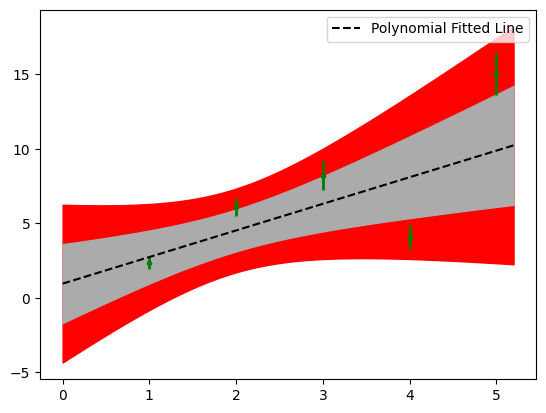

In [ ]:
xfine = np.arange(0,5.2,0.001)
ypred = result.eval(x=xfine)
dely = result.eval_uncertainty(x=xfine, sigma=1)
plt.errorbar(x, y, yerr, linewidth=2, color='g',fmt='.')
plt.plot(xfine, ypred, 'k--',label='Polynomial Fitted Line')
plt.fill_between(xfine, ypred-2*dely, ypred+2*dely, color="r")
plt.fill_between(xfine, ypred-dely, ypred+dely, color="#ABABAB")
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel
x=np.array((1.0,2.0,3.0,4.0,5.0))
y=np.array((2.3,4.1,6.2,8.1,10.0))
yerr=np.array((0.08, 0.12, 0.2 , 0.16, 0.28))

mod = ExpressionModel('(c0+c1*x**1+c2*x**2)')
pars = mod.make_params(c0=0, c1=0,c2=0)
result = mod.fit(y, pars, x=x, weights=1.0/yerr)
print(result.fit_report())



[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 5
    # variables        = 3
    chi-square         = 0.75949657
    reduced chi-square = 0.37974828
    Akaike info crit   = -3.42268696
    Bayesian info crit = -4.59437322
    R-squared          = 0.97982852
[[Variables]]
    c0:  0.45167262 +/- 0.15012052 (33.24%) (init = 0)
    c1:  1.81317130 +/- 0.14678135 (8.10%) (init = 0)
    c2:  0.02267691 +/- 0.02760056 (121.71%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.980
    C(c0, c1) = -0.952
    C(c0, c2) = 0.896
